In [1]:
# pip install 'git+https://github.com/facebookresearch/detectron2.git' intstall in console alongside visual studio build tool c++ to run detectron2 wihtin env

ERROR: Invalid requirement: "'git+https://github.com/facebookresearch/detectron2.git'": Expected package name at the start of dependency specifier
    'git+https://github.com/facebookresearch/detectron2.git'
    ^


In [1]:
import torch


In [2]:
import pycocotools.mask as mask_util

In [3]:

import detectron2
from detectron2.utils.logger import setup_logger

setup_logger()

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

%matplotlib inline

# import some common libraries
import torch
import numpy as np
import cv2
from pathlib import Path
import shutil
from PIL import Image
from tqdm import tqdm
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import os
from IPython.display import clear_output
import time

In [4]:
%matplotlib inline

In [5]:
def segment_detectron2(data, ndata, cfg, mode):
    if ndata == 0:
        ndata = data.shape[0]
    D = []
    predictor = DefaultPredictor(cfg)
    SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))

    t = time.time()
    for i in range(ndata):
        new_im = data[i]
        outputs = predictor(new_im)
        category = outputs["instances"].pred_classes
        mask = outputs["instances"].pred_masks.to("cpu").numpy().astype(bool)
        Z = np.zeros((mask.shape[1], mask.shape[2]), dtype="uint8")
        for idx in range(mask.shape[0]):
            if (mask[idx].sum() < 2000) or (mode == 'phase'):
                msk = (np.uint8(category[idx].cpu()) + 1) * mask[idx]
                if mode == 'phase':
                    msk = cv2.erode(msk.astype('float32'), SE, iterations=1)
                Z = Z * (~(msk > 0)) + msk
        D.append(Z)
        elapsed = time.time() - t
        print('Time required for processing all data: ', elapsed)
        clear_output(wait=True)
        print('frame ', i + 1, '/', ndata)
    D = np.array(D)
    print('Completed')
    return D

In [7]:
# input parameters
imsize = 768  # 768, 1024
image_format = 'png'  # e.g .png, .svg, etc.
img_dpi = 1200

source3 = r"PHASE"

#num_images = 63
sorted_list_dataset = os.listdir(source3)
sorted_list_dataset.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

print(sorted_list_dataset)

Dataset = []
for idx in tqdm(sorted_list_dataset):
    filepath = os.path.join(source3, idx)
    if filepath.endswith(('.', image_format)):
        file = mpimg.imread(filepath)
        file = cv2.resize(file, (imsize, imsize))
        Dataset.append(file)
        
print(Dataset)
Dataset = np.array(Dataset)
Dataset = ((Dataset - Dataset.min()) / Dataset.max()) * 255
Dataset = np.uint8(Dataset)

print('training set shape', Dataset.shape)

print('training set max', Dataset.max())

img = Dataset[0]
print(img)

['phase_0.png', 'phase_1.png', 'phase_2.png', 'phase_3.png', 'phase_4.png', 'phase_5.png', 'phase_6.png', 'phase_7.png', 'phase_8.png', 'phase_9.png', 'phase_10.png', 'phase_11.png', 'phase_12.png', 'phase_13.png', 'phase_14.png', 'phase_15.png', 'phase_16.png', 'phase_17.png', 'phase_18.png', 'phase_19.png', 'phase_20.png', 'phase_21.png', 'phase_22.png', 'phase_23.png', 'phase_24.png', 'phase_25.png', 'phase_26.png', 'phase_27.png', 'phase_28.png', 'phase_29.png', 'phase_30.png', 'phase_31.png', 'phase_32.png', 'phase_33.png', 'phase_34.png', 'phase_35.png', 'phase_36.png', 'phase_37.png', 'phase_38.png', 'phase_39.png', 'phase_40.png', 'phase_41.png', 'phase_42.png', 'phase_43.png', 'phase_44.png', 'phase_45.png', 'phase_46.png', 'phase_47.png', 'phase_48.png', 'phase_49.png', 'phase_50.png', 'phase_51.png', 'phase_52.png', 'phase_53.png', 'phase_54.png', 'phase_55.png', 'phase_56.png', 'phase_57.png', 'phase_58.png', 'phase_59.png', 'phase_60.png', 'phase_61.png', 'phase_62.png', '

100%|██████████| 64/64 [00:01<00:00, 57.69it/s]


[array([[0.01176471, 0.01176471, 0.01176471, ..., 0.01176471, 0.01176471,
        0.01176471],
       [0.01176471, 0.01176471, 0.01176471, ..., 0.01176471, 0.01176471,
        0.01176471],
       [0.01176471, 0.01176471, 0.01176471, ..., 0.01176471, 0.01176471,
        0.01176471],
       ...,
       [0.01176471, 0.01176471, 0.01176471, ..., 0.01176471, 0.01005668,
        0.01110983],
       [0.01176471, 0.01176471, 0.01176471, ..., 0.0104205 , 0.0112477 ,
        0.0108341 ],
       [0.01176471, 0.01176471, 0.01176471, ..., 0.01176471, 0.01176471,
        0.01176471]], dtype=float32), array([[0.01176471, 0.01269531, 0.01176471, ..., 0.01176471, 0.01269531,
        0.01176471],
       [0.01176471, 0.01228171, 0.01176471, ..., 0.01372932, 0.01507353,
        0.01414292],
       [0.01176471, 0.01176471, 0.01176471, ..., 0.01430377, 0.01543735,
        0.01523821],
       ...,
       [0.01176471, 0.01176471, 0.01176471, ..., 0.01176471, 0.01176471,
        0.01176471],
       [0.01176471

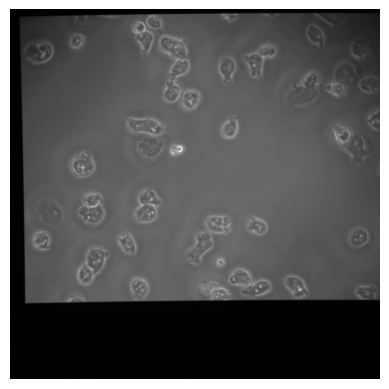

In [11]:
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()